In [71]:
!python --version

Python 3.10.12


In [72]:
import torch
torch.__version__

'2.5.1+cu121'

In [73]:
cd/content/drive/MyDrive/ViT_Pract

/content/drive/MyDrive/Vision-Transformer-Pract


In [74]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms


In [75]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [76]:
#Setup directory
train_dir='/content/drive/MyDrive/ViT_Pract/Custom Dataset/train'
test_dir='/content/drive/MyDrive/ViT_Pract/Custom Dataset/test'

In [77]:
#Create Dataset and DataLoader

import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS=os.cpu_count()

def create_dataloaders(train_dir:str,test_dir:str,transform:transforms.Compose,batch_size:int,num_workers: int=NUM_WORKERS):

  train_data=datasets.ImageFolder(train_dir,transform=transform)
  test_data=datasets.ImageFolder(test_dir,transform=transform)

  class_names=train_data.classes

  #Turn Images into dataloader
  train_dataLoader=DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True
  )

  test_dataLoader=DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True
  )

  return train_dataLoader,test_dataLoader,class_names


In [78]:
#Create Image size
IMG_SIZE=224

# Creating Transform pipeline manually
# Instantiating transforms.ToTensor() to create an object
manual_transforms=transforms.Compose(
    [transforms.Resize((IMG_SIZE,IMG_SIZE)),
     transforms.ToTensor()] # Changed: Calling transforms.ToTensor() to create an instance
)
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [79]:
BATCH_SIZE=32

#create DataLoader
train_dataLoader, test_dataLoader, class_names=create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE)

train_dataLoader,test_dataLoader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x7c94cc5427d0>,
 ['daisy', 'dandelion'])

torch.Size([3, 224, 224]) tensor(0)


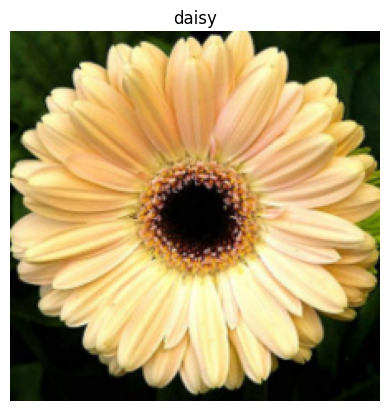

In [80]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataLoader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
print(image.shape, label)

# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

In [81]:
!ls

'Custom Dataset'   helper_functions.py	 vit_trained_model.pth
 engine.py	   __pycache__		 vit_transformer_module.py


In [82]:
import vit_transformer_module
from vit_transformer_module import PatchEmbedding
from vit_transformer_module import MultiheadSelfAttentionBlock
from vit_transformer_module import MLPBlock
from vit_transformer_module import TransformerEncoderBlock
from vit_transformer_module import ViT

In [83]:
# Train our MOdel
# Create an instance of ViT with the number of classes we're working with (daisy, dandelion)
vit = ViT(num_classes=len(class_names))



# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

import  engine
# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataLoader,
                       test_dataloader=test_dataLoader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# Save the trained model's state_dict
torch.save(vit.state_dict(), '/content/drive/MyDrive/ViT_Pract/vit_trained_model.pth')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8543 | train_acc: 0.3750 | test_loss: 9.8784 | test_acc: 0.5000
Epoch: 2 | train_loss: 9.7785 | train_acc: 0.5000 | test_loss: 3.5386 | test_acc: 0.5000
Epoch: 3 | train_loss: 3.5442 | train_acc: 0.5000 | test_loss: 5.3839 | test_acc: 0.5000
Epoch: 4 | train_loss: 5.3615 | train_acc: 0.5000 | test_loss: 3.3541 | test_acc: 0.5000
Epoch: 5 | train_loss: 3.3573 | train_acc: 0.5000 | test_loss: 0.7809 | test_acc: 0.5000
Epoch: 6 | train_loss: 0.7777 | train_acc: 0.5000 | test_loss: 2.0367 | test_acc: 0.5000
Epoch: 7 | train_loss: 2.0265 | train_acc: 0.5000 | test_loss: 1.6823 | test_acc: 0.5000
Epoch: 8 | train_loss: 1.6586 | train_acc: 0.5000 | test_loss: 0.7931 | test_acc: 0.5000
Epoch: 9 | train_loss: 0.7972 | train_acc: 0.5000 | test_loss: 1.1311 | test_acc: 0.5000
Epoch: 10 | train_loss: 1.0698 | train_acc: 0.5000 | test_loss: 0.7001 | test_acc: 0.5000


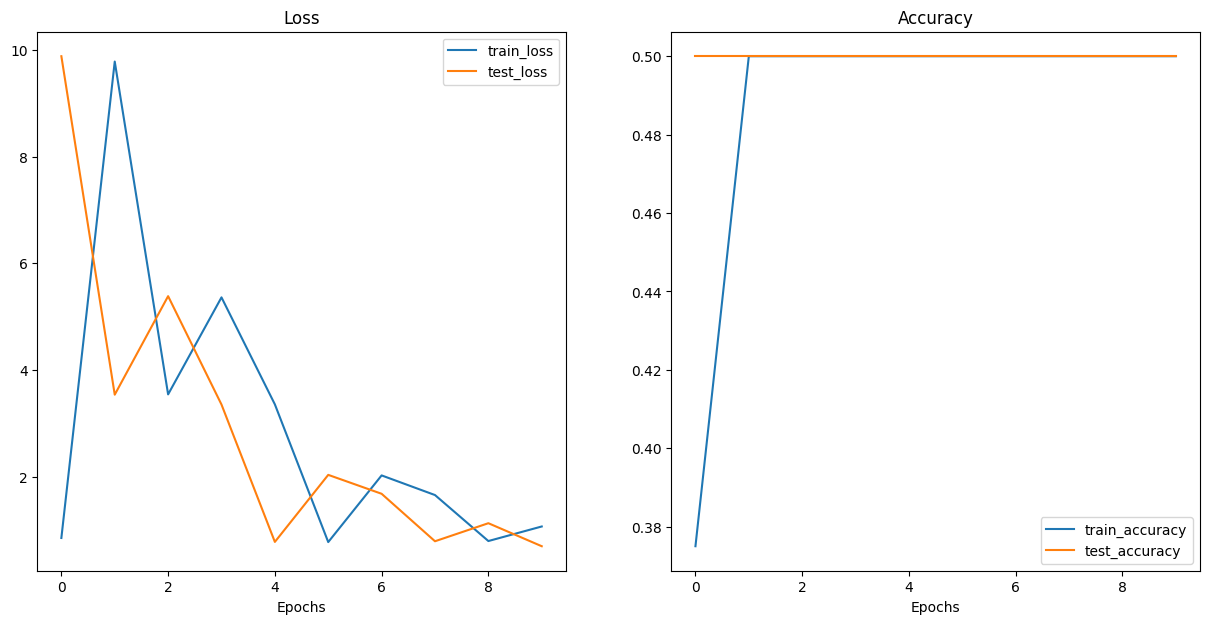

In [84]:
from helper_functions import plot_loss_curves


# Plot our ViT model's loss curves
plot_loss_curves(results)